In [24]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf
from implicit_trap import trapezoidal
from scipy.integrate import odeint
from jacobian import calc_jac
from trapezoidalMatrixFree import trapezoidalMatrixFree
%load_ext autoreload
%autoreload 2

def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from newtonGCR import NewtonGCR
L_list = np.linspace(0,0.5, 50)
tlist = np.linspace(0,1e-7,100) 

S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True, #toggle breakage for debug
     'weno': False  # use weno or not for differentiation w.r.t. L
     }


#integrate the equations
x0 = np.hstack([S0, V0, n0])
f = lambda x: evalf(x, None,p, None)
jf = lambda x: calc_jac(x, p, eps=1e-8)

e_f = 1e-8
e_delta_x = 1e-8
e_x_rel = 1e-8
maxiter = 100
t_start = 0 
t_end = 1e-7
alpha = 5e-3

t_len = len(tlist)
deltat = (tlist[1] - tlist[0])/2
t0 = tlist[1]
T = tlist[t_len-1]



# errf = 1e-5
errf = 1e-2
# errDeltax = 1e-4
errDeltax = 1e-2

errDeltax = 1e-8 ##
errf = 1e-8 ##
relDeltax = 1e-8##
MaxIter = 100 ##


tolrGCR    = 1e-2
epsMF      = 1e-2

# evalf =  -np.arctan(x**2)*np.cos(x**2)



x,converged,errf_k,errDeltax_k,relDeltax_k,iterations,X= NewtonGCR(x0,evalf,p,errf,errDeltax,relDeltax,MaxIter,tolrGCR,epsMF)

type(x0) <class 'numpy.ndarray'>
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
G

#### Test Matrix Free Trapezoidal

In [16]:
from newtonGCR import NewtonGCR
from newton import newtonNd
from jacobian_HannahTest import calc_jac
L_list = np.linspace(0,0.5, 50)
tlist = np.linspace(0,1e-7,100) 

S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True, #toggle breakage for debug
     'weno': True  # use weno or not for differentiation w.r.t. L
     }


#integrate the equations
x0 = np.hstack([S0, V0, n0])



t0 = 0
T = 1e-5
deltat =0.0000001


# errf = 1e-5
errf = 1e-2
# errDeltax = 1e-4
errDeltax = 1e-2

errDeltax = 1e-2 ##
errf = 1e-2 ##
relDeltax = 1e-2##
MaxIter = 100 ##

# tolrGCR    = 1e-5
# epsMF      = 1e-7
tolrGCR    = 1e-2
epsMF      = 1e-2


def evalf_old(x,p):
    """
    dummy evalf to test NewtonGCR
    Inputs:
        x0: guess
        
        
    outputs:
        nonlinear output
    """
    
    # out = -np.arctan(x**2)*np.cos(x**2)-0.3
    # out = 3*x**3 -x 
    out = ((0.5*x-2)**2) -2
    # out =3
    return out


# x0 =np.linspace(0,10,100)
# x_t= newtonNd(evalf, calc_jac, x0, errf, errDeltax, relDeltax, MaxIter)
x,converged,errf_k,errDeltax_k,relDeltax_k,iterations,X=NewtonGCR(x0,evalf,p,errf,errDeltax,relDeltax,MaxIter,tolrGCR,epsMF)
print("#########")

print(x[:,-1])   

type(x0) <class 'numpy.ndarray'>
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
GCR converged
G

In [3]:

np.linalg.norm([0],np.inf)

# print(type(x))
# print(len(x))
# print(x)
# print("##################")
# print(x[-1])

0.0

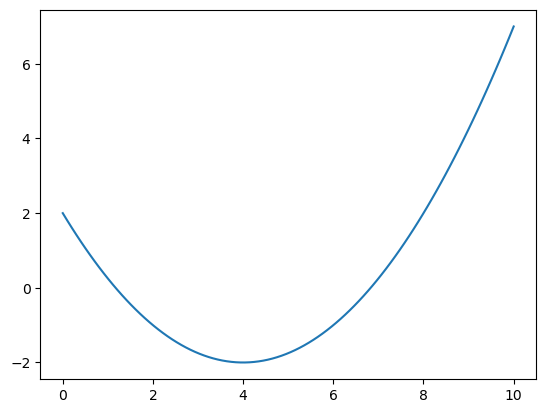

In [18]:
x =np.linspace(0,10,100)
out =3*(x-2)**2 -15 
out = -np.arctan(x**2)*np.cos(x**2)-0.3
out = ((0.5*x-2)**2) -2
# plt.xlim([-10,300])
plt.plot(x,out)

In [25]:
from evalf import evalf
from euler import euler
L_list = np.linspace(0,0.5, 50)


tlist = np.linspace(0,1e-5,1000)

S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True, #toggle breakage for debug
     'weno': False  # use weno or not for differentiation w.r.t. L
     }


#integrate the equations
x0 = np.hstack([S0, V0, n0])


t0 = tlist[0]
len_t = len(tlist)
T = tlist[len_t-1]


print("T",T)
# errf = 1e-5
errf = 1e-2
# errDeltax = 1e-4
errDeltax = 1e-2

errDeltax = 1e-2 ##
errf = 1e-2 ##
relDeltax = 1e-2##
MaxIter = 100 ##

# tolrGCR    = 1e-5
# epsMF      = 1e-7
tolrGCR    = 1e-2
epsMF      = 1e-2


deltat =(T -t0)/ len(tlist)



x_t, tlist=trapezoidalMatrixFree( evalf,x0, deltat, t0, T, p, errf, errDeltax, relDeltax, MaxIter,tolrGCR,epsMF)

# tlist = np.arange(t0,T,deltat)

# L_list = np.linspace(0,1, 50)
# tlist = np.linspace(0,1e-5,1000) 
# x_t_euler = euler(x0, t_vec = tlist, p = p) 

T 1e-05
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton converged in iterations
 0
Newton

In [27]:
x_t =np.array(x_t)

# print(x_t.shape)
# print(type(x_t[:,0]))
# print(type(tlist))


# print(type(x_t_euler))

#### Plot Results

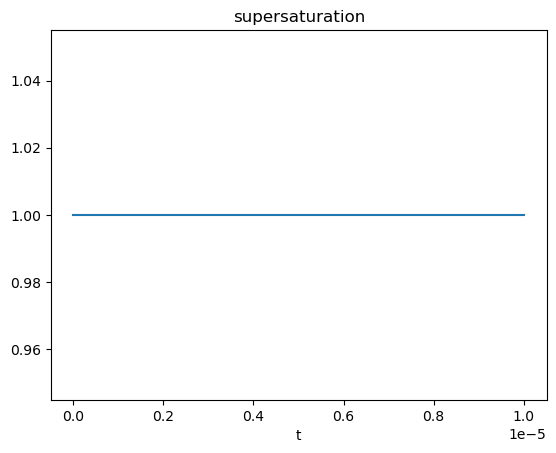

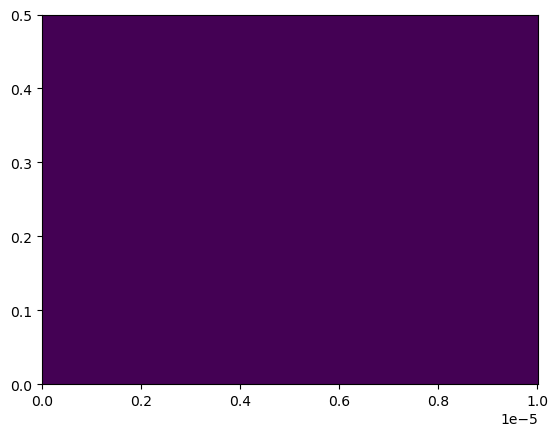

In [28]:
plt.plot(np.array(tlist),  x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()


# print(np.array(x_t)[:,1])

n_t = x_t[:,2:]

better_imshow(L_list, tlist, n_t.T)

#### Test Implicit Trapezoidal 

In [18]:
L_list = np.linspace(0,0.5, 50)
tlist = np.linspace(0,1,100) 

S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True, #toggle breakage for debug
     'weno': True  # use weno or not for differentiation w.r.t. L
     }


#integrate the equations
x0 = np.hstack([S0, V0, n0])
f = lambda x: evalf(x, None,p, None)
jf = lambda x: calc_jac(x, p, eps=1e-8)

e_f = 1e-8
e_delta_x = 1e-8
e_x_rel = 1e-8
maxiter = 100
t_start = 0 
t_end = 1e-7
alpha = 5e-3

x_t, tlist = trapezoidal(f, x0, t_start, t_end, alpha, jf, e_f, e_delta_x, e_x_rel, maxiter)

TypeError: evalf() takes 2 positional arguments but 4 were given

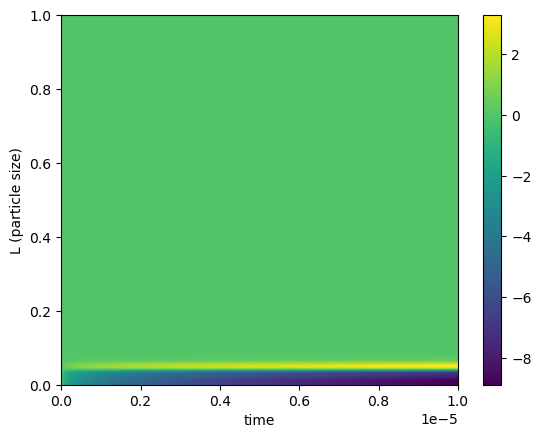

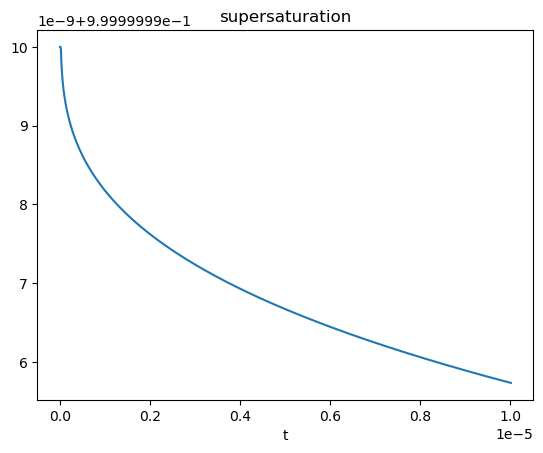

Text(0.5, 0, 't')

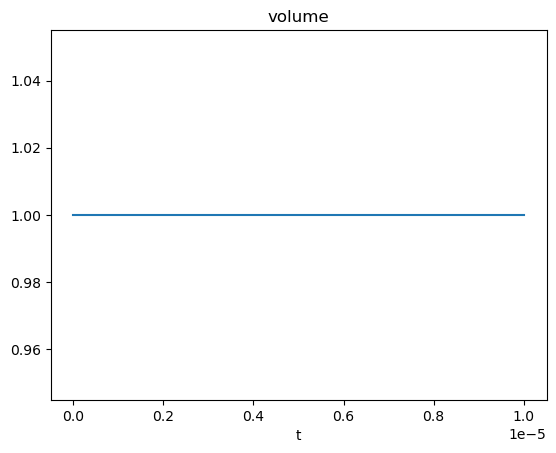

In [16]:
#plot results
x_t = np.array(x_t)
n_t = x_t[:,2:]
x_ref = x_t[-1,2:] #reference for analysis below
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')

In [ ]:
len(tlist)

99

Testing alpha values

In [ ]:
t_end = 1e-5
alpha = 1e-1
x_t, tlist = trapezoidal(f, x0, t_start, t_end, alpha, jf, e_f, e_delta_x, e_x_rel, maxiter)


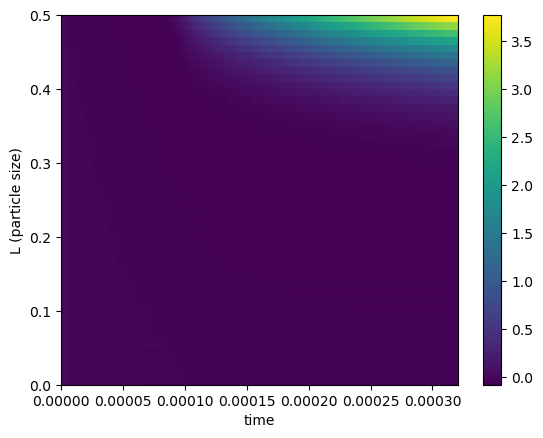

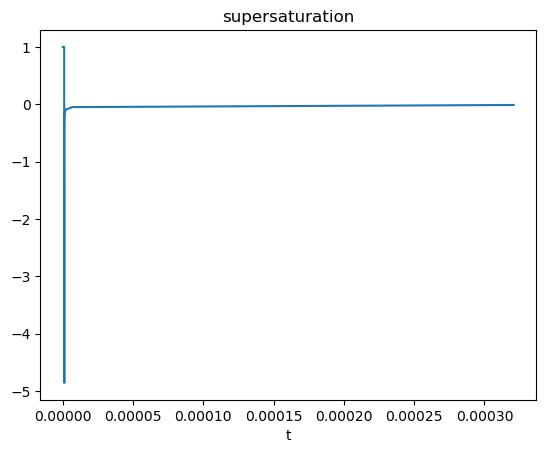

Text(0.5, 0, 't')

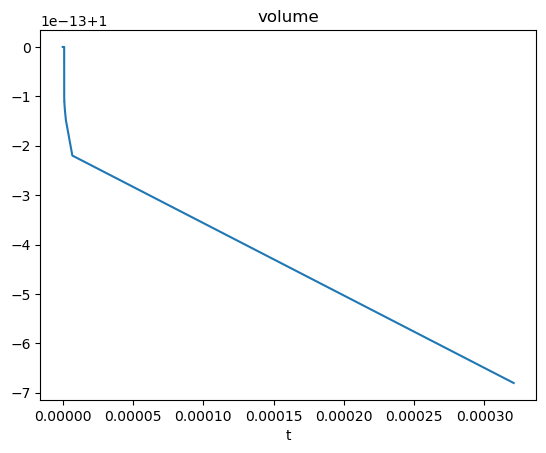

In [ ]:
#plot results
x_t = np.array(x_t)
n_t = x_t[:,2:]
x_ref = x_t[-1,2:] #reference for analysis below
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')